In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: yfinance in c:\users\91963\appdata\local\programs\python\python312\lib\site-packages (0.2.40)




[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import yfinance as yf
import pandas as pd

# Download historical data for a given stock
def download_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Example: Downloading data for Apple Inc. (AAPL)
ticker = "AAPL"
start_date = "2010-01-01"
end_date = "2023-01-01"
stock_data = download_stock_data(ticker, start_date, end_date)

# Display the first few rows of the data
print(stock_data.head())


[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.461975  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.473148  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.370184  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.358408  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.400681  447610800


In [7]:
import numpy as np

# Calculate Moving Averages
def calculate_moving_averages(data, window):
    data[f'MA_{window}'] = data['Close'].rolling(window=window).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    data[f'RSI_{window}'] = 100 - (100 / (1 + rs))

# Calculate MACD
def calculate_macd(data, short_window, long_window, signal_window):
    data['MACD'] = data['Close'].ewm(span=short_window, adjust=False).mean() - data['Close'].ewm(span=long_window, adjust=False).mean()
    data['MACD_Signal'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

# Add technical indicators to the data
calculate_moving_averages(stock_data, window=20)
calculate_rsi(stock_data, window=14)
calculate_macd(stock_data, short_window=12, long_window=26, signal_window=9)

# Drop rows with missing values
stock_data.dropna(inplace=True)

# Display the first few rows of the data with technical indicators
print(stock_data.head())


                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2010-02-01  6.870357  7.000000  6.832143  6.954643   5.879822  749876400   
2010-02-02  6.996786  7.011429  6.906429  6.995000   5.913942  698342400   
2010-02-03  6.970357  7.150000  6.943571  7.115357   6.015697  615328000   
2010-02-04  7.026071  7.084643  6.841786  6.858929   5.798900  757652000   
2010-02-05  6.879643  7.000000  6.816071  6.980714   5.901862  850306800   

               MA_20     RSI_14      MACD  MACD_Signal  
Date                                                    
2010-02-01  7.395214  38.180129 -0.144875    -0.091934  
2010-02-02  7.362804  40.705333 -0.153625    -0.104272  
2010-02-03  7.335750  41.111458 -0.149129    -0.113243  
2010-02-04  7.301964  37.621088 -0.164363    -0.123467  
2010-02-05  7.274964  42.533146 -0.164710    -0.131716  


In [8]:
# Define the feature set and target variable
features = stock_data[['MA_20', 'RSI_14', 'MACD', 'MACD_Signal']]
target = stock_data['Close']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Training and testing sets created.")


Training and testing sets created.


In [9]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 0.5485943356014433
MSE: 1.1066460034188348
RMSE: 1.0519724347238548


In [11]:
# Predict future stock prices
future_predictions = model.predict(X_test)

# Display the predictions
print(future_predictions)


[ 44.68055054   8.96461798 173.1143985   24.07229303  19.35013613
  25.25282497  27.601175    36.06162422  79.37920181 129.48819443
  22.94481821  18.23867126  28.67459986  17.79795364  30.74177469
  14.05772132  23.86738235  28.09352514  56.58037476  23.3985251
  11.99832511  12.35427121   8.96764993 173.55450058  43.40532482
  15.91650357  54.31837532  12.24748899 146.34289856   9.29650371
  14.54893189  66.19482651  18.27031385  20.31850317   8.05109664
  29.86809965  24.49857483  12.39527126  27.85382496  19.01674999
  25.38617498  39.85482552  42.84797577  17.44146446 148.46380112
 114.63619789  20.58504295  48.34674919  27.65262484  30.04042517
  56.01412498  20.64749632  12.17915339  21.39178196 141.83639938
  34.20057407  12.44614978   9.14609314  13.48099271  14.42405323
  39.03072517  26.93977526  53.16490002 111.01492577 118.39879997
  24.39762144  16.7769858   49.54252491  12.30491395  51.43482533
  18.80751022  72.55110016  11.15987152  90.91322319 109.02430138
  42.294350

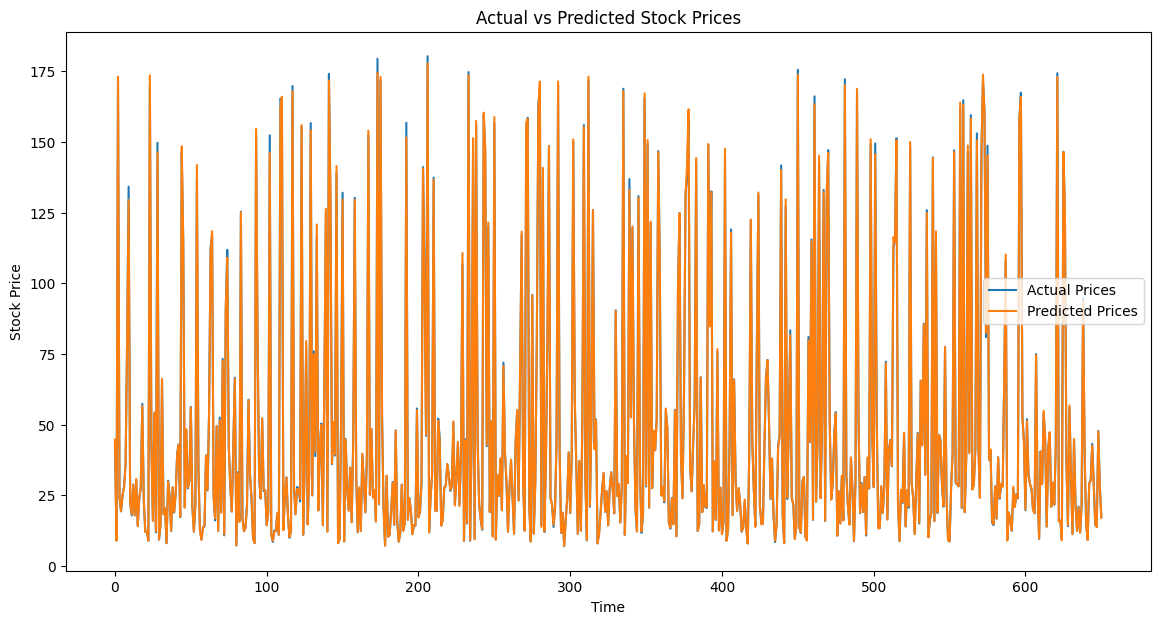

In [12]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
